## Project - Mobile Phone Price Prediction

#### 1. Import Libraries and Load Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


plt.style.use('ggplot')
sns.set(style="whitegrid")
np.random.seed(42)

In [36]:
df = pd.read_csv('dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### 2. Data Exploration and Analysis

In [3]:
print("Dataset shape:", df.shape)
print("\nDataset info:")
df.info()
print("\nSummary statistics:")
df.describe()

Dataset shape: (2000, 21)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g    

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

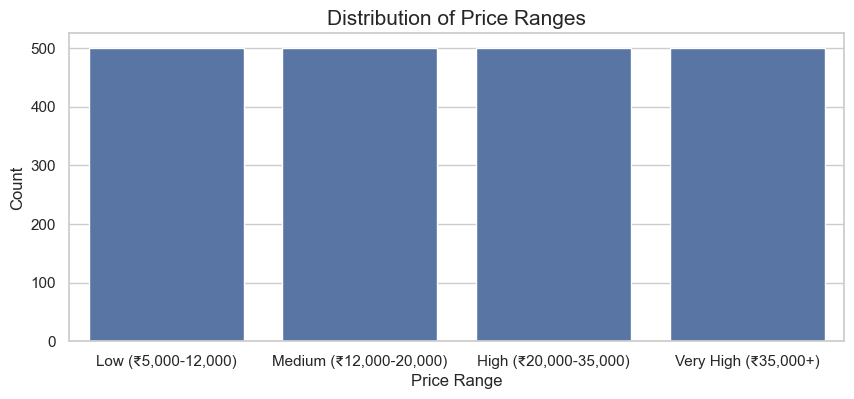

In [6]:
plt.figure(figsize=(10, 4))
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Price Ranges', fontsize=15)

price_ranges = {
    0: 'Low (₹5,000-12,000)',
    1: 'Medium (₹12,000-20,000)',
    2: 'High (₹20,000-35,000)',
    3: 'Very High (₹35,000+)'
}

plt.xticks(ticks=[0, 1, 2, 3], labels=[price_ranges[i] for i in range(4)])
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

#### 3. Data Visualization and Feature Analysis

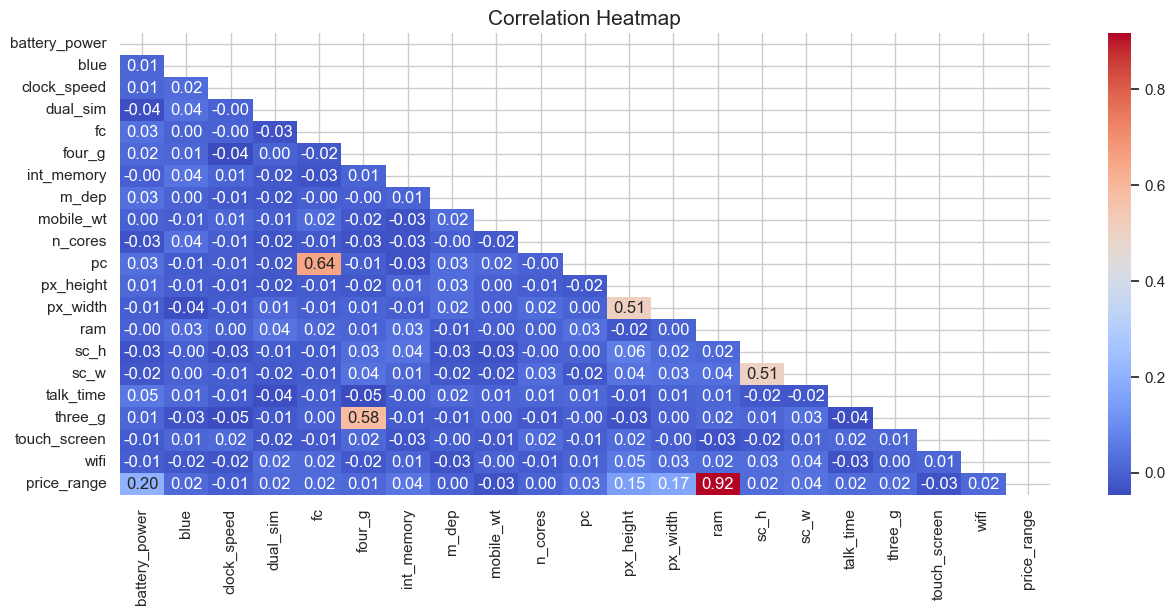

In [9]:
plt.figure(figsize=(15, 6))
correlation = df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

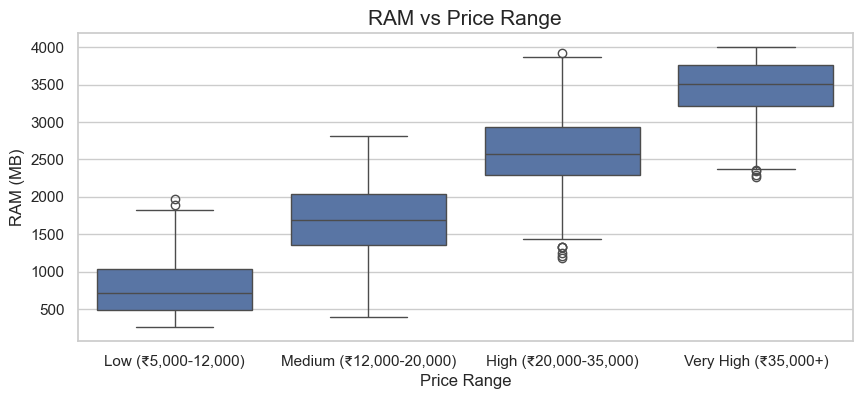

In [11]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('RAM vs Price Range', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=[price_ranges[i] for i in range(4)])
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

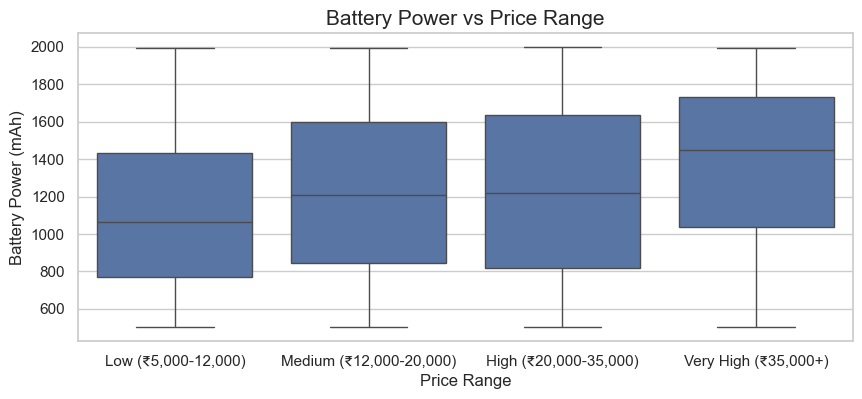

In [12]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power vs Price Range', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=[price_ranges[i] for i in range(4)])
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

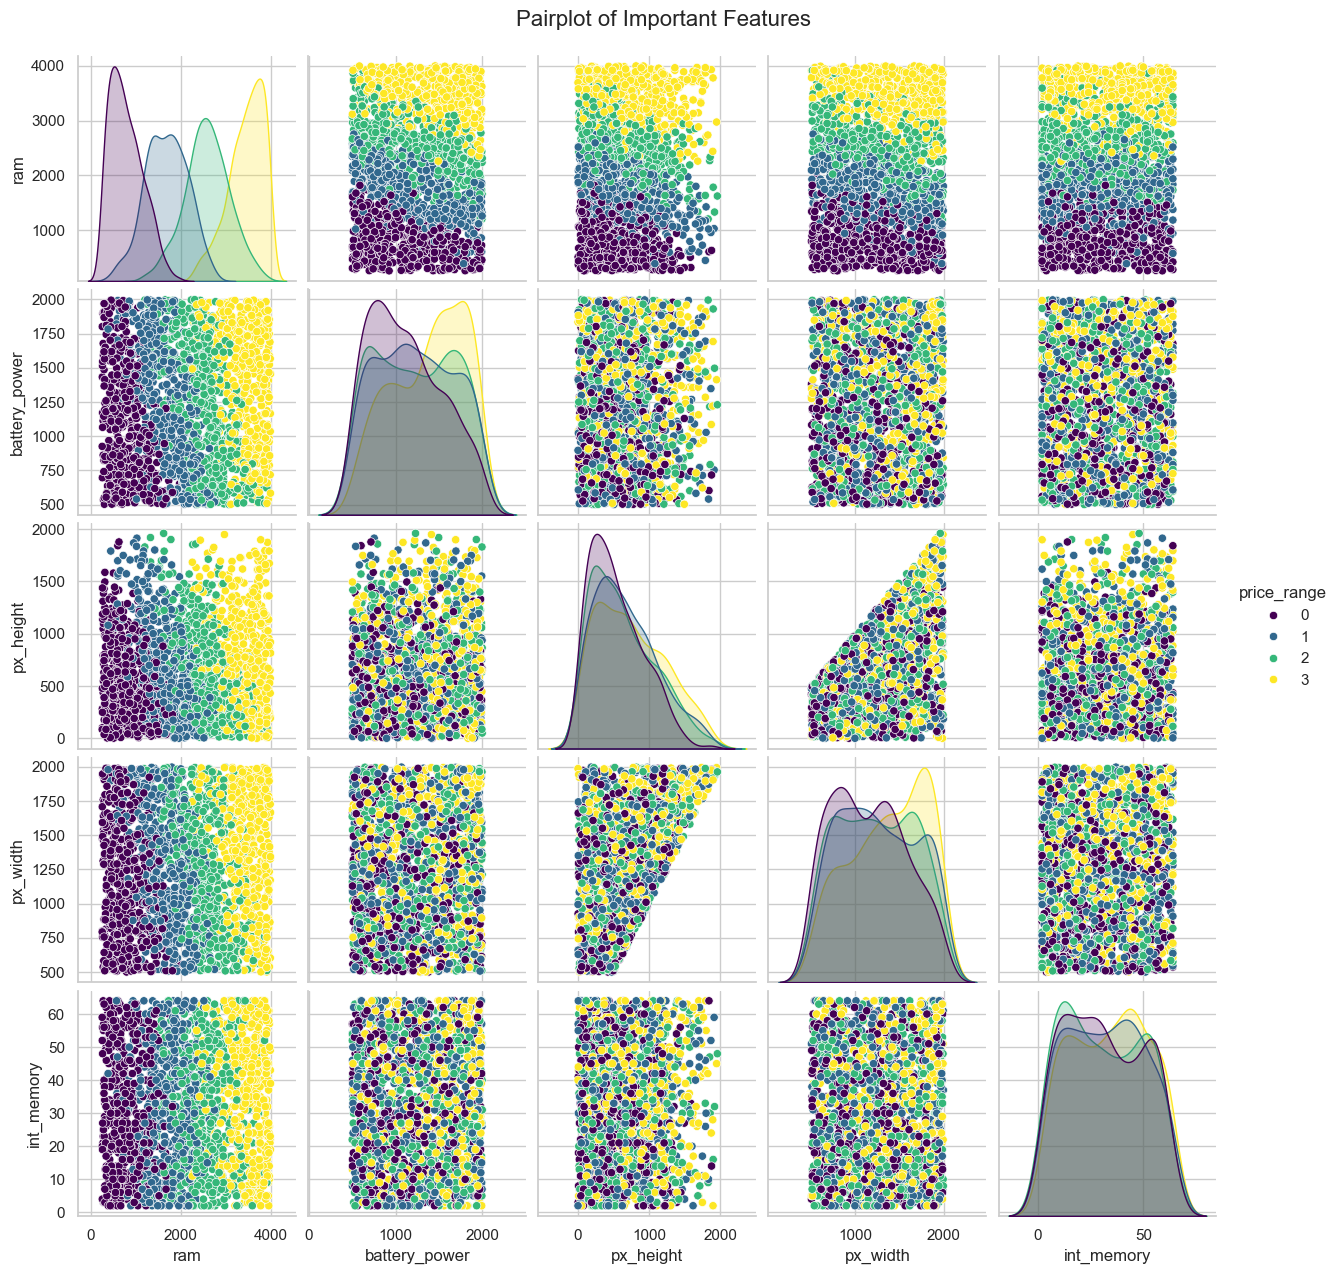

In [13]:
important_features = ['ram', 'battery_power', 'px_height', 'px_width', 'int_memory', 'price_range']
sns.pairplot(df[important_features], hue='price_range', palette='viridis')
plt.suptitle('Pairplot of Important Features', y=1.02, fontsize=16)
plt.show()

C:\Users\dellc\AppData\Local\Temp\ipykernel_7124\2424572585.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([price_ranges[i] for i in range(4)])
C:\Users\dellc\AppData\Local\Temp\ipykernel_7124\2424572585.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([price_ranges[i] for i in range(4)])


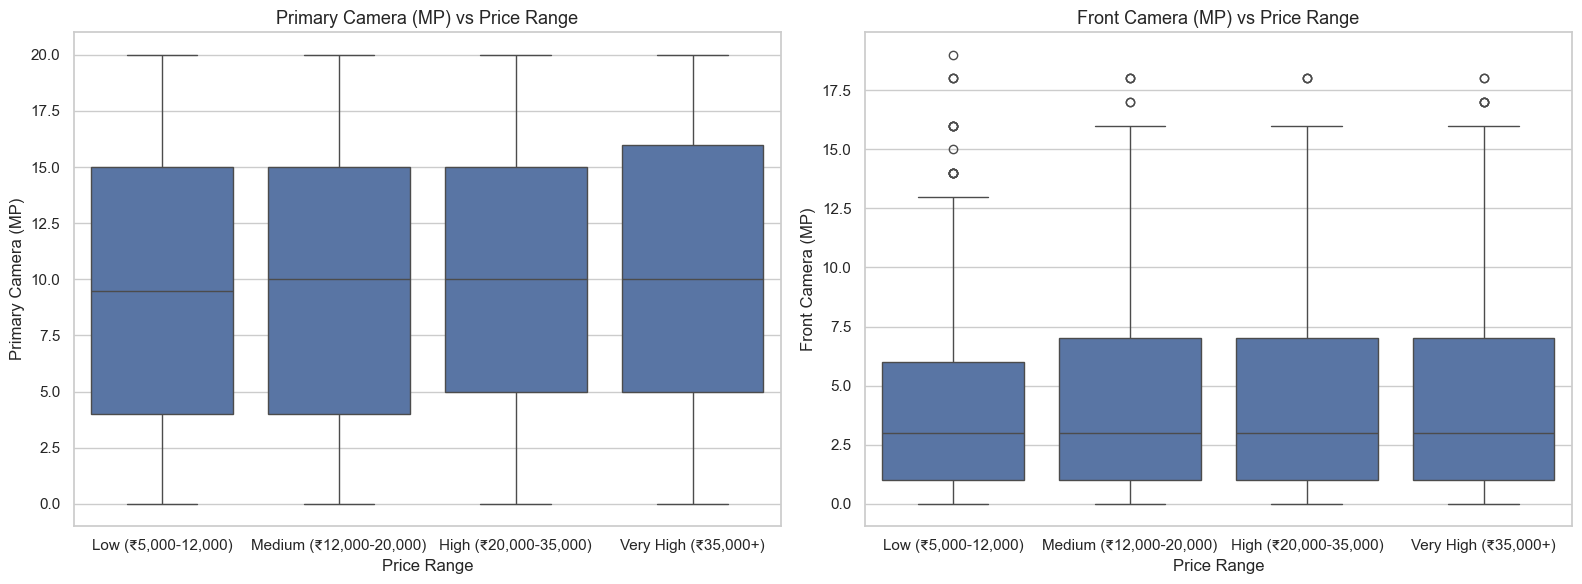

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(x='price_range', y='pc', data=df, ax=axes[0])
axes[0].set_title('Primary Camera (MP) vs Price Range', fontsize=13)
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Primary Camera (MP)')
axes[0].set_xticklabels([price_ranges[i] for i in range(4)])

sns.boxplot(x='price_range', y='fc', data=df, ax=axes[1])
axes[1].set_title('Front Camera (MP) vs Price Range', fontsize=13)
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Front Camera (MP)')
axes[1].set_xticklabels([price_ranges[i] for i in range(4)])

plt.tight_layout()
plt.show()

C:\Users\dellc\AppData\Local\Temp\ipykernel_7124\1451733361.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price_range', y='screen_area', data=df, ci=None)


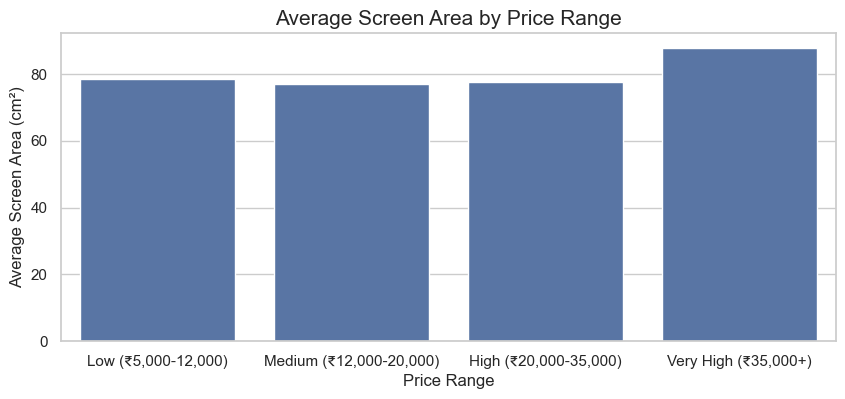

In [16]:
df['screen_area'] = df['sc_h'] * df['sc_w']

df['resolution'] = df['px_height'] * df['px_width']

plt.figure(figsize=(10, 4))
sns.barplot(x='price_range', y='screen_area', data=df, ci=None)
plt.title('Average Screen Area by Price Range', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=[price_ranges[i] for i in range(4)])
plt.xlabel('Price Range')
plt.ylabel('Average Screen Area (cm²)')
plt.show()

## 4. Feature Selection and Preprocessing

In [17]:
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1600, 22)
Testing set shape: (400, 22)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## 5. Model Training and Evaluation

Accuracy: 0.8975

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.86      0.88      0.87        91
           2       0.83      0.87      0.85        92
           3       0.95      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



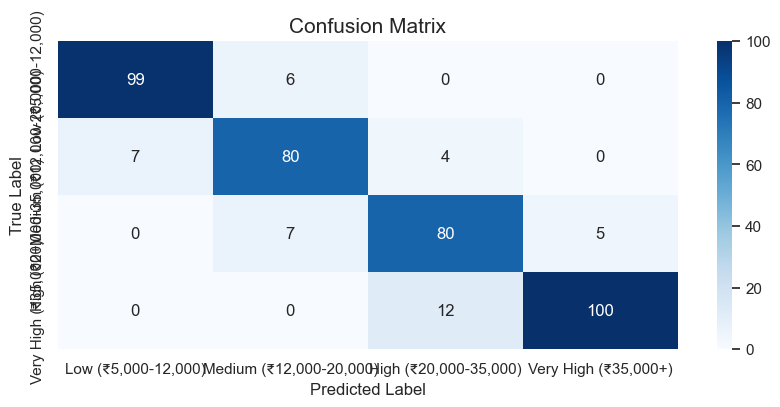

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=[price_ranges[i] for i in range(4)])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=[price_ranges[i] for i in range(4)])
plt.show()

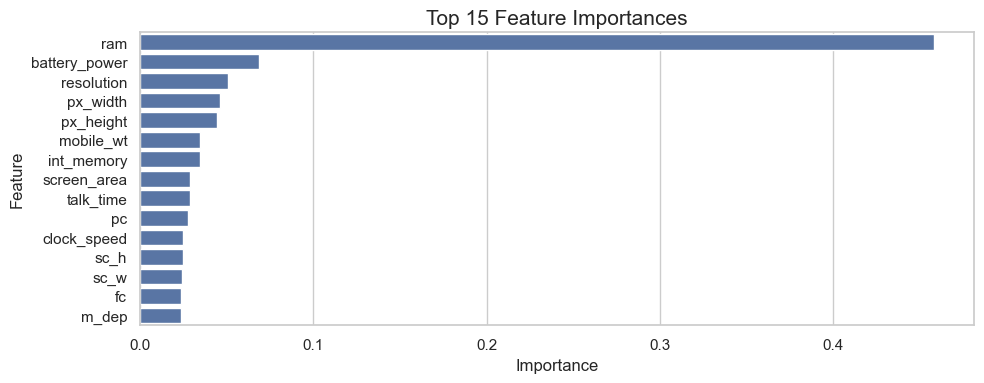

In [23]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Feature Importances', fontsize=15)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 6. Save Model for Deployment

In [ ]:
with open('mobile_price_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

feature_names = list(X.columns)
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)

print("Model and feature names saved successfully!")

Model and feature names saved successfully!


## 7. Create Price Range Dictionary for Interpretation

In [25]:
price_range_dict = {
    0: "Low (₹5,000-12,000)",
    1: "Medium (₹12,000-20,000)",
    2: "High (₹20,000-35,000)",
    3: "Very High (₹35,000+)"
}

with open('price_range_dict.pkl', 'wb') as file:
    pickle.dump(price_range_dict, file)

print("Price range dictionary saved successfully!")

Price range dictionary saved successfully!


## 8. Model Testing with Sample Data

In [ ]:
def predict_price_range(sample_data):
  
    sample_df = pd.DataFrame([sample_data], columns=feature_names)
    
    sample_scaled = scaler.transform(sample_df)

    prediction = rf_model.predict(sample_scaled)[0]
    probability = np.max(rf_model.predict_proba(sample_scaled))
    
    return prediction, probability, price_range_dict[prediction]
high_end_phone = {
    'battery_power': 1800,
    'blue': 1,
    'clock_speed': 2.0,
    'dual_sim': 1,
    'fc': 16,
    'four_g': 1,
    'int_memory': 64,
    'm_dep': 0.9,
    'mobile_wt': 180,
    'n_cores': 8,
    'pc': 20,
    'px_height': 1920,
    'px_width': 1080,
    'ram': 3500,
    'sc_h': 15,
    'sc_w': 8,
    'talk_time': 20,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1,
    'screen_area': 15 * 8,
    'resolution': 1920 * 1080
}

prediction, probability, price_range = predict_price_range(high_end_phone)
print(f"Predicted price range: {price_range}")
print(f"Prediction probability: {probability:.2f}")

Predicted price range: Very High (₹35,000+)
Prediction probability: 0.75


In [27]:
budget_phone = {
    'battery_power': 1000,
    'blue': 1,
    'clock_speed': 1.2,
    'dual_sim': 1,
    'fc': 5,
    'four_g': 0,
    'int_memory': 16,
    'm_dep': 0.7,
    'mobile_wt': 150,
    'n_cores': 4,
    'pc': 8,
    'px_height': 1280,
    'px_width': 720,
    'ram': 1500,
    'sc_h': 12,
    'sc_w': 6,
    'talk_time': 8,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1,
    'screen_area': 12 * 6,
    'resolution': 1280 * 720
}

prediction, probability, price_range = predict_price_range(budget_phone)
print(f"Predicted price range: {price_range}")
print(f"Prediction probability: {probability:.2f}")

Predicted price range: Medium (₹12,000-20,000)
Prediction probability: 0.52
